# Machine Learning

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("iris.csv")

## Feature Engineering / Data Cleaning

these topic of feature engineering are cover in another files in your PC

# Feature Selection

A feature is an attribute that has an impact on a problem or is useful for the problem, and choosing the important features for the model is known as feature selection.

#### encoding for machine learning model

In [3]:
from sklearn.preprocessing import OrdinalEncoder

In [4]:
oe = OrdinalEncoder()

In [5]:
dataset["species"] = oe.fit_transform(dataset[["species"]])

In [6]:
dataset.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0


### Forward Elimination (using MLXTEND)

In [7]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [8]:
x = dataset.iloc[:,:-1]      #separate x-axis and y-axis
y = dataset["species"]

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
lr = LogisticRegression()

In [11]:
fs = SequentialFeatureSelector(lr,k_features=3,forward=True)

In [12]:
fs.fit(x,y)

SequentialFeatureSelector(estimator=LogisticRegression(), k_features=(3, 3),
                          scoring='accuracy')

In [13]:
fs.feature_names

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [14]:
fs.k_feature_names_

('sepal_length', 'petal_length', 'petal_width')

In [15]:
fs.k_score_

np.float64(0.9666666666666668)

In [16]:
# 4 = 0.9733333333333334
# 3 = 0.9666666666666668
# 2 = 0.96
# 1 = 0.96

## Train Test Split in Data Set

In [17]:
dataframe = pd.read_csv("Titanic-Dataset.csv")

In [18]:
dataframe.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### Data cleaning for machine learning

In [19]:
dataframe.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
dataframe["Age"].fillna(dataframe["Age"].mean(), inplace=True)

C:\Users\Z\AppData\Local\Temp\ipykernel_11088\3341303642.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataframe["Age"].fillna(dataframe["Age"].mean(), inplace=True)


In [21]:
dataframe.drop(columns=["Cabin"], inplace=True)

In [22]:
dataframe["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [23]:
dataframe["Embarked"].fillna(dataframe["Embarked"].mode()[0],inplace=True)

C:\Users\Z\AppData\Local\Temp\ipykernel_11088\892453461.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataframe["Embarked"].fillna(dataframe["Embarked"].mode()[0],inplace=True)


In [24]:
dataframe.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [25]:
dataframe.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


#### Categorical Encoding

##### Name

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataframe["Name"] = le.fit_transform(dataframe[["Name"]]) 


C:\Users\Z\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


##### Sex

In [27]:
ord_data = {"male":2,"female":3}

In [28]:
dataframe["Sex"] = dataframe["Sex"].map(ord_data)

##### Ticket

In [29]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()    #(categories= ord_data) value/varaiable name
dataframe["Ticket"] = oe.fit_transform(dataframe[["Ticket"]])


##### Embarked

In [30]:
dataframe["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [31]:
ord1_data = {"S":4,"C":5,"Q":6}

In [32]:
dataframe["Embarked"] = dataframe["Embarked"].map(ord1_data)

In [33]:
dataframe.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,108,2,22.0,1,0,523.0,7.2500,4
1,2,1,1,190,3,38.0,1,0,596.0,71.2833,5
2,3,1,3,353,3,26.0,0,0,669.0,7.9250,4


In [34]:
dataframe.shape

(891, 11)

## Train Test Split in Data Set

In [35]:
input_data = dataframe.iloc[:,:-1]
output_data = dataframe["Embarked"]

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train, x_test, y_train, y_test = train_test_split(input_data, output_data,test_size=0.25)

In [38]:
x_train.shape

(668, 10)

In [39]:
# use train data when we train machine learning model and use test data when we check accuracy

# Regression Analysis

In a dataset, when determining the type of prediction, you base your decision on the output. If the output or outcome is continuous, you use regression analysis. Otherwise, you use classification analysis.

## Linear Regression Algorithm (Simple Linear)

In [40]:
sl_dataset = pd.read_csv("simple_linear_regression_dataset.csv")

In [41]:
sl_dataset.head(3)

,Feature,Target
0,37.454012,107.052589
1,95.071431,266.440285
2,73.199394,202.502724


In [42]:
sl_dataset.isnull().sum()

Feature    0
Target     0
dtype: int64

In [43]:
x = sl_dataset[["Feature"]]
y = sl_dataset["Target"]

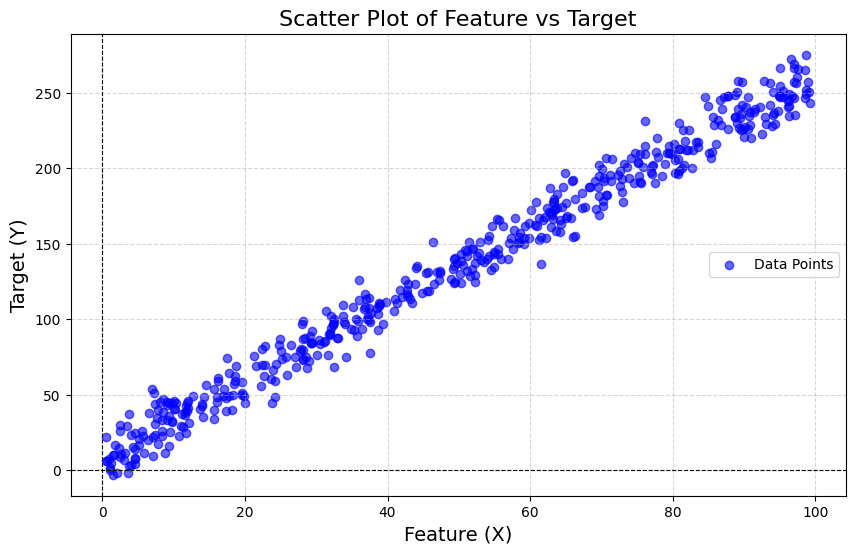

In [44]:
plt.figure(figsize=(10, 6))
plt.scatter(x="Feature", y="Target", data=sl_dataset,color='blue', alpha=0.6, label='Data Points')
plt.title('Scatter Plot of Feature vs Target', fontsize=16)
plt.xlabel('Feature (X)', fontsize=14)
plt.ylabel('Target (Y)', fontsize=14)
plt.axhline(y=0, color='black', linewidth=0.8, linestyle='--')
plt.axvline(x=0, color='black', linewidth=0.8, linestyle='--')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
lr = LinearRegression()

In [49]:
lr.fit(x_train, y_train)

LinearRegression()

In [50]:
lr.score(x_test,y_test)

0.9811807446291563

In [51]:
lr.predict([[37.45012]])

C:\Users\Z\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([103.26950033])

In [52]:
# y = m*x + c

In [53]:
lr.coef_   # m

array([2.52327729])

In [54]:
lr.intercept_ # c

np.float64(8.772462946297566)

In [55]:
# y=2.52327729*37.454012+8.772462946297566

In [56]:
2.52327729*37.454012+8.772462946297566

103.27932084528503

In [57]:
y_prd = lr.predict(x)

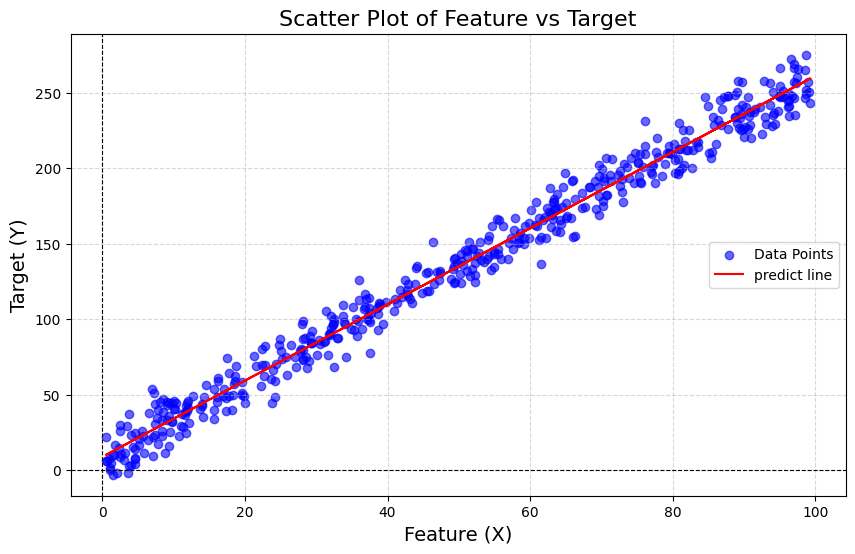

In [58]:
plt.figure(figsize=(10, 6))
plt.scatter(x="Feature", y="Target", data=sl_dataset,color='blue', alpha=0.6, label='Data Points')
plt.plot(sl_dataset["Feature"], y_prd,color = "red", label="predict line")
plt.title('Scatter Plot of Feature vs Target', fontsize=16)
plt.xlabel('Feature (X)', fontsize=14)
plt.ylabel('Target (Y)', fontsize=14)
plt.axhline(y=0, color='black', linewidth=0.8, linestyle='--')
plt.axvline(x=0, color='black', linewidth=0.8, linestyle='--')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

## Multiple Linear Regression

In [59]:
ml_dataset = pd.read_csv("multiple_linear_regression_dataset.csv")

In [60]:
ml_dataset.head(3)

,Feature1,Feature2,Feature3,Target
0,37.454012,34.908086,37.026586,116.561993
1,95.071431,26.804818,108.380189,516.131582
2,73.199394,15.476381,174.589167,544.718359


In [61]:
ml_dataset.describe()

,Feature1,Feature2,Feature3,Target
count,500.000000,500.000000,500.000000,500.000000
mean,49.856171,24.097570,103.511624,341.345034
std,29.868841,14.274673,59.438587,156.201564
min,0.506158,0.231601,0.987996,-18.337770
25%,24.127969,11.454962,48.245610,224.084744
50%,51.316375,23.591078,107.947667,347.443026
75%,75.612488,36.316841,155.468752,444.608770
max,99.296480,49.985884,199.882745,714.864691


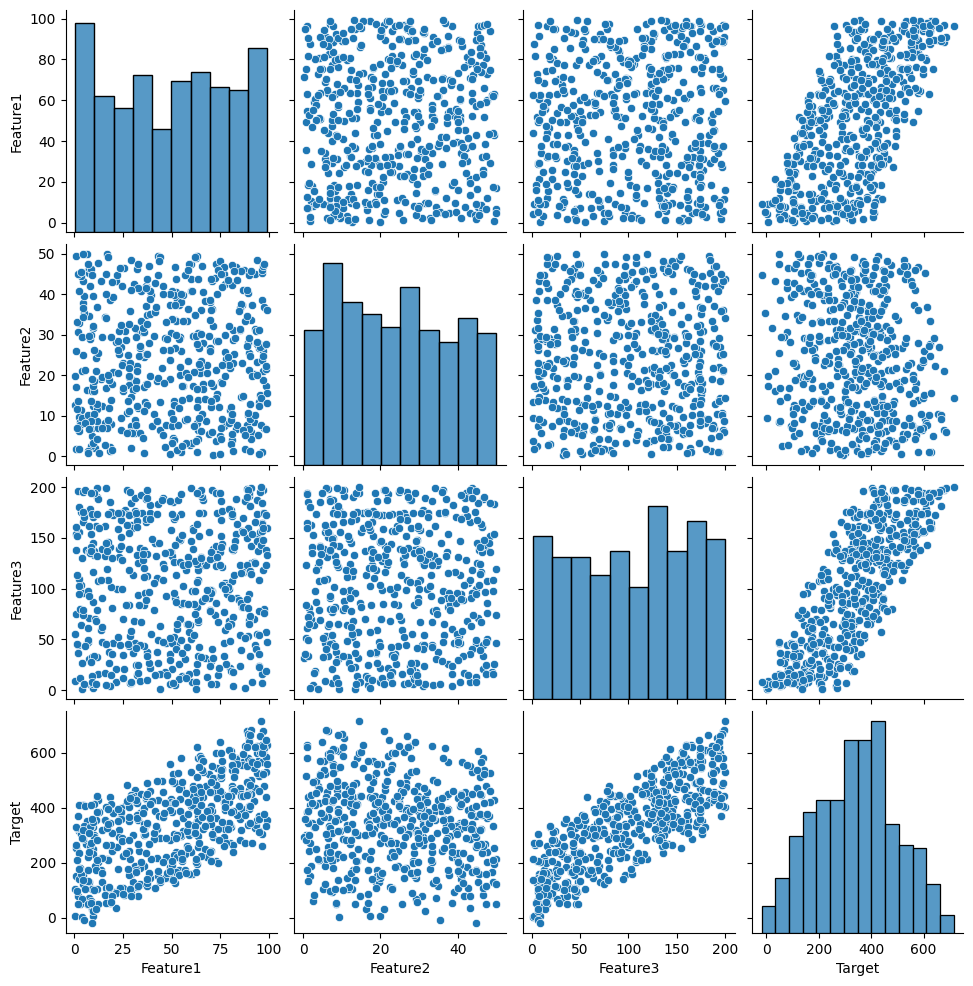

In [62]:
sns.pairplot(data=ml_dataset)
plt.show()

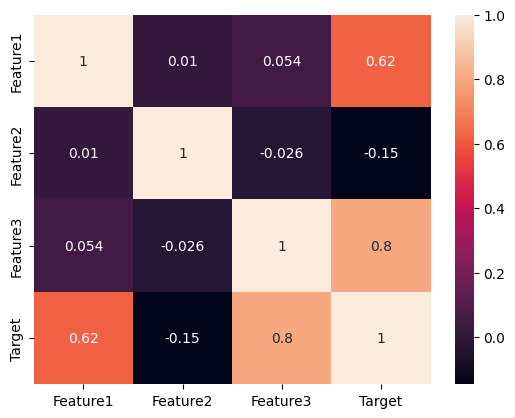

In [63]:
sns.heatmap(data=ml_dataset.corr(), annot=True)
plt.show()

In [64]:
ml_x = ml_dataset.iloc[:,:-1]
ml_y = ml_dataset["Target"]

In [65]:
x.ndim

2

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
x_train, x_test, y_train, y_test = train_test_split(ml_x, ml_y, test_size=0.2, random_state=42)

In [68]:
from sklearn.linear_model import LinearRegression

In [69]:
ml_lr = LinearRegression()

In [70]:
ml_lr.fit(x_train, y_train)

LinearRegression()

In [71]:
ml_lr.score(x_test,y_test)*100

98.7576995300787

In [72]:
# y m1*x1+m2*x2+m3*x3+c

In [73]:
ml_lr.coef_

array([ 3.03737113, -1.44414216,  2.0121138 ])

In [74]:
ml_lr.intercept_

np.float64(15.89343046851019)

In [75]:
# y_prd = 3.03737113*Feature1+-1.44414216*Feature2+2.0121138*Feature3+15.89343046851019

## Polynomial Regression

In [76]:
pr_dataset = pd.read_csv("polynomial_regression_dataset.csv")

In [77]:
pr_dataset.head(3)

,Feature,Target
0,3.745401,5.104693
1,9.507143,42.313024
2,7.319939,22.562967


In [78]:
pr_dataset.corr()

,Feature,Target
Feature,1.00000,0.86889
Target,0.86889,1.00000


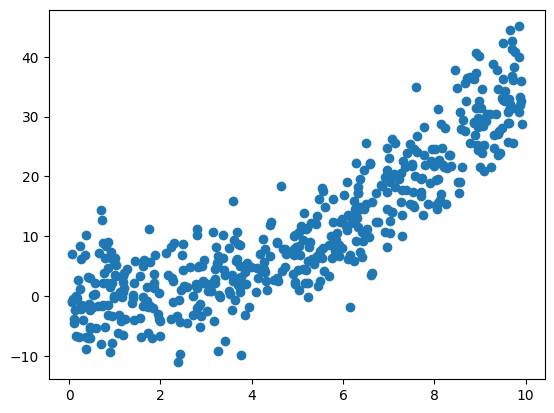

In [79]:
plt.scatter(pr_dataset["Feature"], pr_dataset["Target"])
plt.show()

In [80]:
pr_x = pr_dataset[["Feature"]]
pr_y = pr_dataset["Target"]

In [81]:
from sklearn.preprocessing import PolynomialFeatures

In [82]:
pf = PolynomialFeatures(degree=3)

In [83]:
pf.fit(pr_x)

PolynomialFeatures(degree=3)

In [84]:
pr_x = pf.transform(pr_x)

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
x_train, x_test, y_train, y_test = train_test_split(pr_x, pr_y, test_size=0.2,random_state=42)

In [87]:
from sklearn.linear_model import LinearRegression

In [88]:
pr_lr = LinearRegression()

In [89]:
pr_lr.fit(x_train,y_train)

LinearRegression()

In [90]:
pr_lr.score(x_test,y_test)

0.8014061863562691

In [91]:
# y = m1*x1+m2*x2^2+c
# y = -1.05954074*x1 + 0.46752086*x2^2 - 0.8695309013342438

In [92]:
pr_lr.coef_  # m

array([ 0.        , -0.42383546,  0.30758613,  0.01065521])

In [93]:
pr_lr.intercept_  # c

np.float64(0.363169559517619)

In [94]:
pr_prd = pr_lr.predict(pr_x)

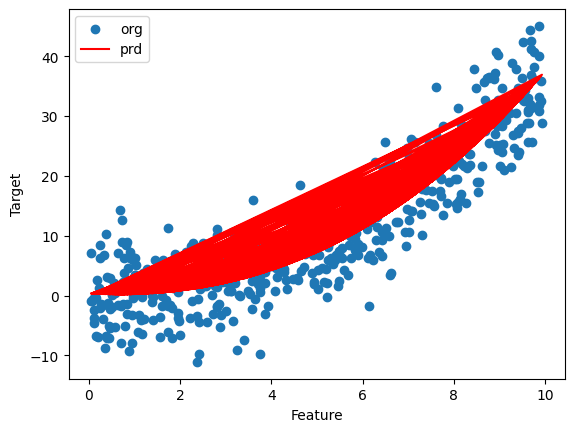

In [95]:
plt.scatter(pr_dataset["Feature"],pr_dataset["Target"])
plt.plot(pr_dataset["Feature"], pr_prd, c="red")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend(["org","prd"])
plt.show()

In [98]:
test = pf.transform([[5]])
test

C:\Users\Z\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([[  1.,   5.,  25., 125.]])

In [99]:
pr_lr.predict(test)

array([7.26554701])

## Regularization Techniaque: L1(Lasso Regularization), L2 (Ridge Regularization)

Regularization Technique are used to improve accuracy of the model.

In [147]:
r_dataset = pd.read_csv("regularization_dataset.csv")

In [148]:
r_dataset.head(3)

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Target
0,37.454012,95.071431,73.199394,59.865848,15.601864,15.599452,5.808361,86.617615,60.111501,70.807258,-112.218971
1,2.058449,96.990985,83.244264,21.233911,18.182497,18.340451,30.424224,52.475643,43.194502,29.122914,-110.040941
2,61.185289,13.949386,29.214465,36.636184,45.606998,78.517596,19.967378,51.423444,59.241457,4.645041,412.079541


#### Check Correlation

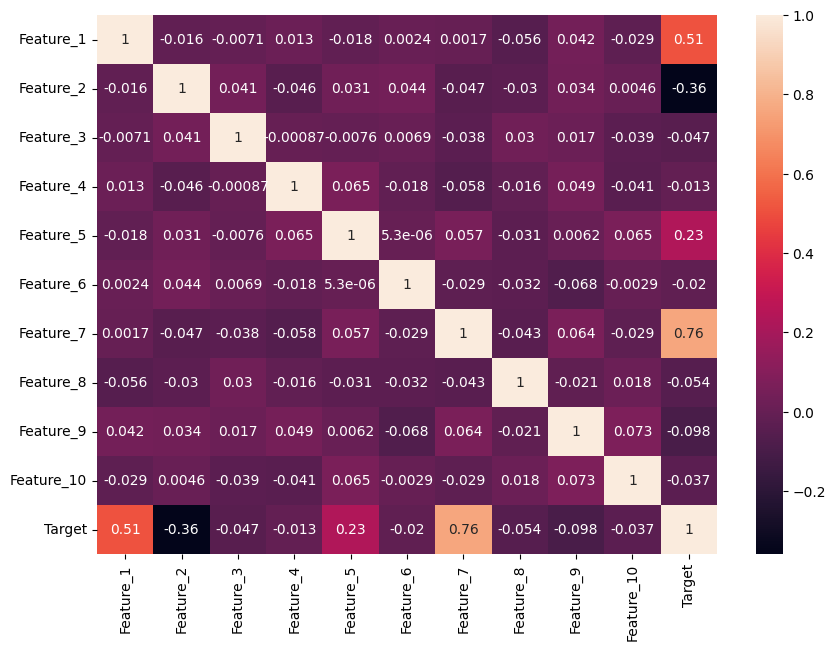

In [149]:
plt.figure(figsize=(10,7))
sns.heatmap(r_dataset.corr(), annot=True)
plt.show()

In [150]:
r_x = r_dataset.iloc[:,:-1]
r_y = r_dataset["Target"]

#### Feature Scaling

In [151]:
from sklearn.preprocessing import StandardScaler

In [152]:
ss = StandardScaler()

In [153]:
ss.fit(r_x)
r_x  = pd.DataFrame(ss.transform(r_x), columns=r_x.columns)

#### Train Test Split

In [154]:
from sklearn.model_selection import train_test_split

In [155]:
r_x_train, r_x_test, r_y_train, r_y_test = train_test_split(r_x,r_y, test_size=0.2, random_state=42)

#### Linear Regression

In [156]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [157]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [158]:
r_lr = LinearRegression()
r_lr.fit(r_x_train,r_y_train)

LinearRegression()

In [159]:
r_lr.score(r_x_test,r_y_test)*100

99.88739248751754

In [160]:
print(r2_score(r_y_test,r_lr.predict(r_x_test)))
print(mean_squared_error(r_y_test,r_lr.predict(r_x_test)))
print(mean_absolute_error(r_y_test,r_lr.predict(r_x_test)))
print(np.sqrt(mean_squared_error(r_y_test,r_lr.predict(r_x_test))))

0.9988739248751755
80.47809469992261
6.909439928990563
8.97095840475936


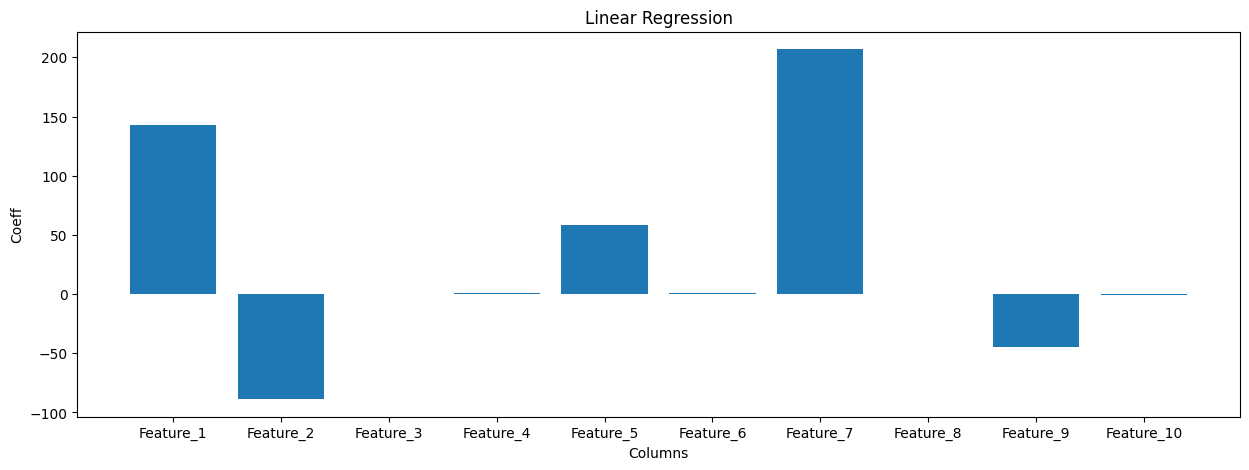

In [161]:
plt.figure(figsize=(15,5))
plt.bar(r_x.columns,r_lr.coef_)
plt.title("Linear Regression")
plt.xlabel("Columns")
plt.ylabel("Coeff")
plt.show()

#### L1 (Lasso Regularization)

In [162]:
ls = Lasso(alpha=0.5)
ls.fit(r_x_train, r_y_train)
ls.score(r_x_test,r_y_test)*100

99.88570826795277

In [164]:
print(mean_squared_error(r_y_test,ls.predict(r_x_test)))
print(mean_absolute_error(r_y_test,ls.predict(r_x_test)))
print(np.sqrt(mean_squared_error(r_y_test,ls.predict(r_x_test))))

81.6817691141888
7.045021961751561
9.03779669577651


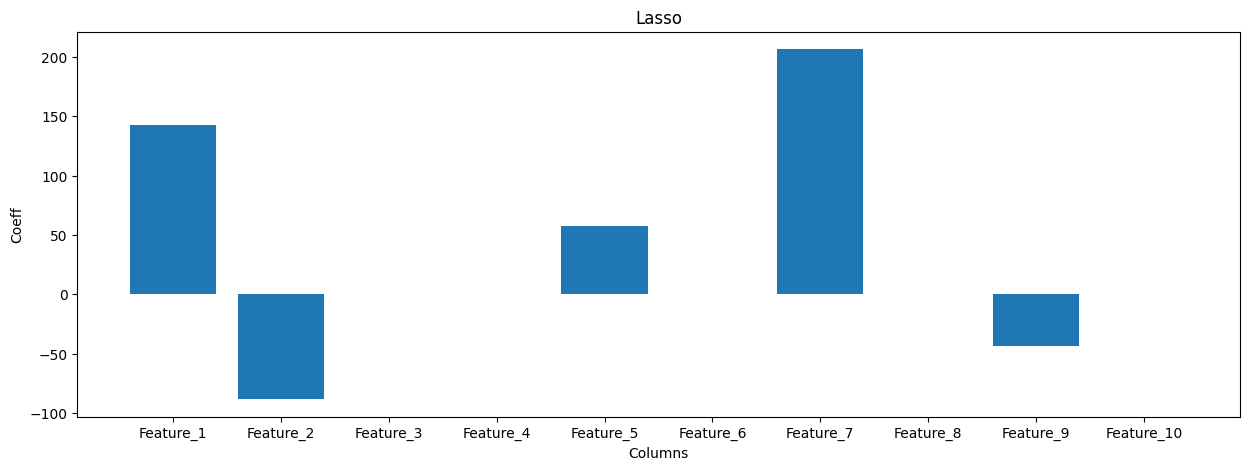

In [165]:
plt.figure(figsize=(15,5))
plt.bar(r_x.columns,ls.coef_)
plt.title("Lasso")
plt.xlabel("Columns")
plt.ylabel("Coeff")
plt.show()

#### L2 (Ridge Regularization)

In [166]:
ri = Ridge(alpha=10)
ri.fit(r_x_train, r_y_train)
ri.score(r_x_test,r_y_test)*100

99.8113335907345

In [167]:
print(mean_squared_error(r_y_test,ri.predict(r_x_test)))
print(mean_absolute_error(r_y_test,ri.predict(r_x_test)))
print(np.sqrt(mean_squared_error(r_y_test,ri.predict(r_x_test))))

134.83570338105164
8.999238605228726
11.611877685415552


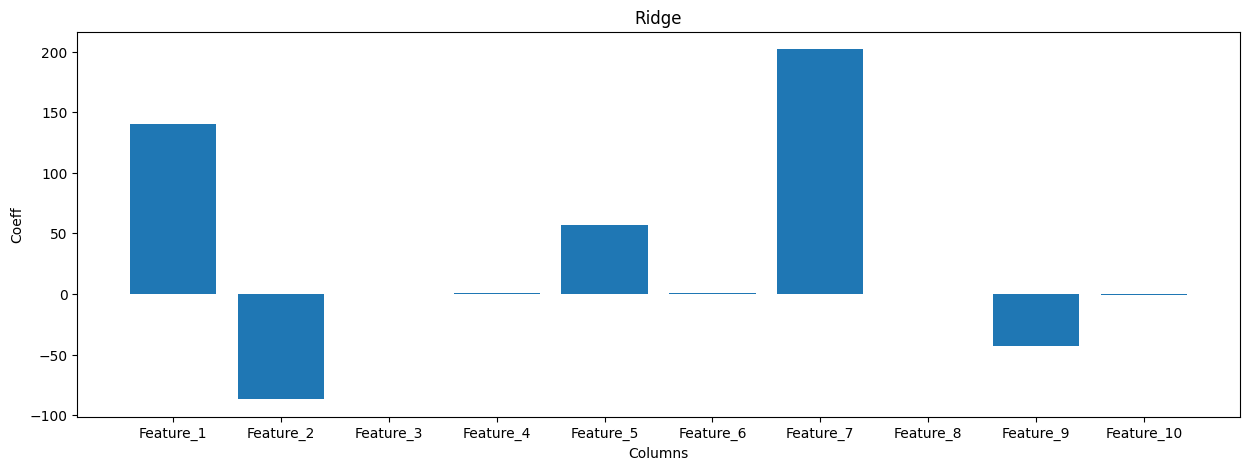

In [168]:
plt.figure(figsize=(15,5))
plt.bar(r_x.columns,ri.coef_)
plt.title("Ridge")
plt.xlabel("Columns")
plt.ylabel("Coeff")
plt.show()

In [170]:
df = pd.DataFrame({"col_name": r_x.columns,"LinearRegression": r_lr.coef_,"Lasso": ls.coef_,"Ridge":ri.coef_})

In [171]:
df

,col_name,LinearRegression,Lasso,Ridge
0,Feature_1,143.268992,142.792381,139.807104
1,Feature_2,-88.826439,-88.355859,-86.895274
2,Feature_3,0.377892,0.000000,0.137352
3,Feature_4,1.022563,0.571076,1.027607
4,Feature_5,58.253347,57.742947,57.209676
5,Feature_6,0.969986,0.401277,0.657166
6,Feature_7,206.877831,206.404986,201.898179
7,Feature_8,-0.016048,-0.000000,-0.222574
8,Feature_9,-44.322720,-43.832862,-43.002096
9,Feature_10,-0.526310,-0.095548,-1.000324


# Classification Analysis

## Logistic Regression (Binary Classification)

In [6]:
sp_dataset = pd.read_csv("logistic_regression_student_pass_dataset.csv")

In [7]:
sp_dataset.head()

,StudyHours,Pass
0,3.745401,0
1,9.507143,1
2,7.319939,1
3,5.986585,0
4,1.560186,0


In [41]:
sp_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   StudyHours  500 non-null    float64
 1   Pass        500 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 7.9 KB


In [40]:
sp_dataset.describe()

,StudyHours,Pass
count,500.000000,500.000000
mean,4.985617,0.516000
std,2.986884,0.500244
min,0.050616,0.000000
25%,2.412797,0.000000
50%,5.131637,1.000000
75%,7.561249,1.000000
max,9.929648,1.000000


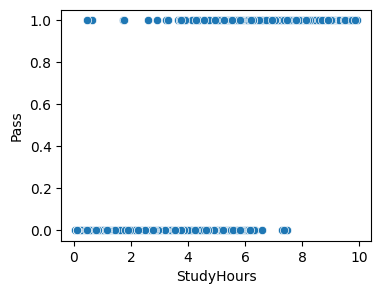

In [12]:
plt.figure(figsize=(4,3))
sns.scatterplot(x="StudyHours", y="Pass", data=sp_dataset)
plt.show()

In [42]:
x = sp_dataset[["StudyHours"]]
y= sp_dataset["Pass"]

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [47]:
from sklearn.linear_model import LogisticRegression

In [49]:
blo = LogisticRegression()

In [50]:
blo.fit(x_train,y_train)

LogisticRegression()

In [51]:
blo.score(x_test,y_test)

0.89

In [61]:
blo.predict([[5.1]])

C:\Users\Z\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

## Logistic Regression (Binary Classification) (Multiple Input)

In [64]:
lo_dataset = pd.read_csv("logistic_regression_customer_purchase_dataset.csv")

In [65]:
lo_dataset.head()

,Age,Income,AdClicks,Purchase
0,56,24000,14,0
1,46,90588,23,1
2,32,121042,29,1
3,60,113610,10,0
4,25,140420,15,1


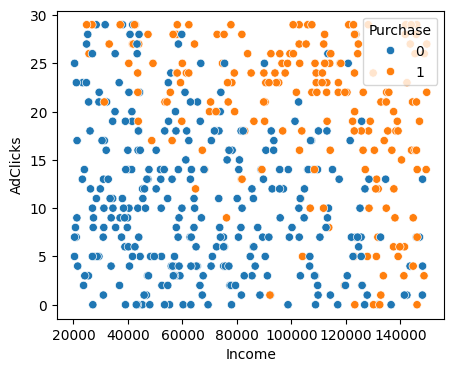

In [70]:
plt.figure(figsize=(5,4))
sns.scatterplot(x="Income",y="AdClicks",data=lo_dataset, hue="Purchase")
plt.show()

In [71]:
x = lo_dataset.iloc[:,:-1]
y = lo_dataset["Purchase"]

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
lo = LogisticRegression()

In [76]:
lo.fit(x_train,y_train)

LogisticRegression()

In [77]:
lo.score(x_test,y_test)

0.84

In [92]:
lo.coef_

array([[3.17147257e-02, 4.57164686e-05, 2.07674592e-01]])

In [93]:
lo.intercept_

array([-8.84224743])

In [83]:
lo.predict([[23,100000, 25]])

C:\Users\Z\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [84]:
from mlxtend.plotting import plot_decision_regions

## Logistic Regression (Binary Classification) (Polynomial Input)

In [61]:
bp_dataset = pd.read_csv("logistic_regression_heart_disease_dataset.csv")

In [62]:
bp_dataset.head()

,BMI,Cholesterol,BMI^2,Cholesterol^2,BMI_Cholesterol_Interaction,HeartDisease
0,26.239883,254.724257,688.531440,64884.447157,6683.934605,0
1,38.915715,230.414455,1514.432854,53090.821051,8966.743201,0
2,34.103867,196.429142,1163.073725,38584.408001,6698.993294,0
3,31.170487,272.069253,971.599238,74021.678404,8480.531018,0
4,21.432410,252.709676,459.348202,63862.180285,5416.177407,0


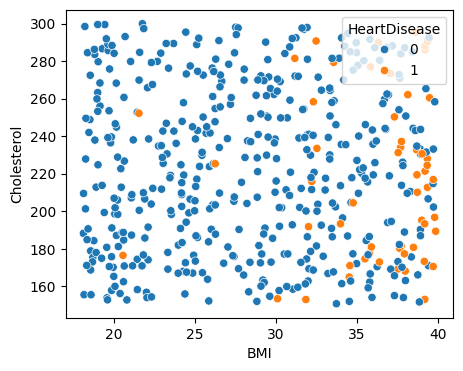

In [63]:
plt.figure(figsize=(5,4))
sns.scatterplot(x="BMI",y="Cholesterol", data=bp_dataset, hue="HeartDisease")
plt.show()

### Simple Logistic Regression

In [64]:
x = bp_dataset[["BMI","Cholesterol"]]
y = bp_dataset["HeartDisease"]

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
lr = LogisticRegression()

In [69]:
lr.fit(x_train, y_train)

LogisticRegression()

In [70]:
lr.score(x_test, y_test)

0.89

In [71]:
from mlxtend.plotting import plot_decision_regions

C:\Users\Z\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


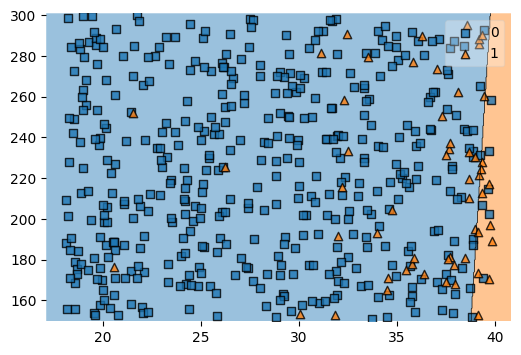

In [72]:
plt.figure(figsize=(6,4))
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=lr)
plt.show()

### polynomial Feature

In [73]:
xx = bp_dataset[["BMI", "Cholesterol"]]
yy = bp_dataset["HeartDisease"]

In [74]:
from sklearn.preprocessing import PolynomialFeatures

In [75]:
pf = PolynomialFeatures(degree=3)
pf.fit(xx)
xx = pd.DataFrame(pf.transform(xx))

In [76]:
xx_train, xx_test, yy_train, yy_test = train_test_split(xx, yy, test_size=0.2, random_state=42)

In [77]:
lrr = LogisticRegression()

In [78]:
lrr.fit(xx_train, yy_train)

C:\Users\Z\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [79]:
lrr.score(xx_test, yy_test)

0.89

## Logistic Regression (Multiclass Classification)

In [2]:
mc_dataset = pd.read_csv("logistic_regression_student_performance_dataset.csv")

In [3]:
mc_dataset.head()

,StudyHours,SleepHours,Extracurricular,Attendance,PerformanceCategory
0,3.745401,8.188970,3,79.394219,3
1,9.507143,7.216578,2,97.429168,4
2,7.319939,5.857166,4,62.626389,4
3,5.986585,8.882770,0,67.962537,4
4,1.560186,8.108387,4,68.967929,3


In [4]:
mc_dataset["PerformanceCategory"].unique()

array([3, 4, 2, 1])

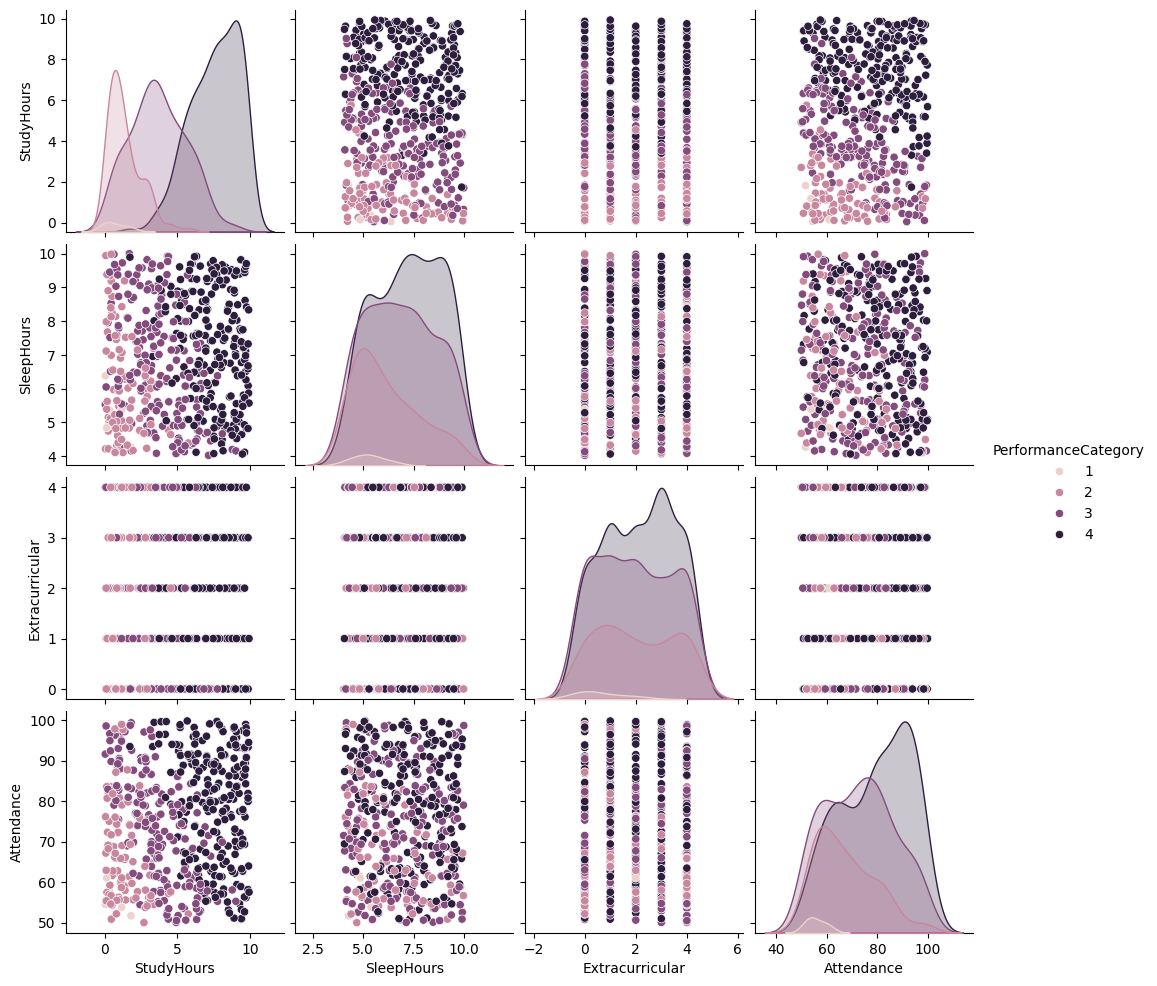

In [5]:
sns.pairplot(data=mc_dataset, hue="PerformanceCategory")
plt.show()

In [6]:
x = mc_dataset.iloc[:,:-1]
y = mc_dataset["PerformanceCategory"]

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.2, random_state=42)

### OVR Method

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
lr = LogisticRegression(multi_class="ovr")

In [11]:
lr.fit(x_train,y_train)

C:\Users\Z\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='ovr')

In [22]:
lr.score(x_test,y_test)

0.96

### Multinomial / Softmax Function

In [23]:
lr1 = LogisticRegression(multi_class="multinomial")

In [24]:
lr1.fit(x_train, y_train)

C:\Users\Z\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Z\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [25]:
lr1.score(x_test, y_test)

0.76

## Confusion Matric (Precision, Recall, F1-Score)

In [13]:
cm_dataset = pd.read_csv("logistic_regression_heart_disease_dataset.csv")

In [15]:
cm_dataset.head(3)

,BMI,Cholesterol,BMI^2,Cholesterol^2,BMI_Cholesterol_Interaction,HeartDisease
0,26.239883,254.724257,688.531440,64884.447157,6683.934605,0
1,38.915715,230.414455,1514.432854,53090.821051,8966.743201,0
2,34.103867,196.429142,1163.073725,38584.408001,6698.993294,0


In [17]:
x = cm_dataset[["BMI", "Cholesterol"]]
y = cm_dataset["HeartDisease"]

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
lr = LogisticRegression()

In [22]:
lr.fit(x_train, y_train)

LogisticRegression()

In [23]:
lr.score(x_test,y_test)

0.89

In [25]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [28]:
cf = confusion_matrix(y_test, lr.predict(x_test))
cf

array([[87,  2],
       [ 9,  2]])

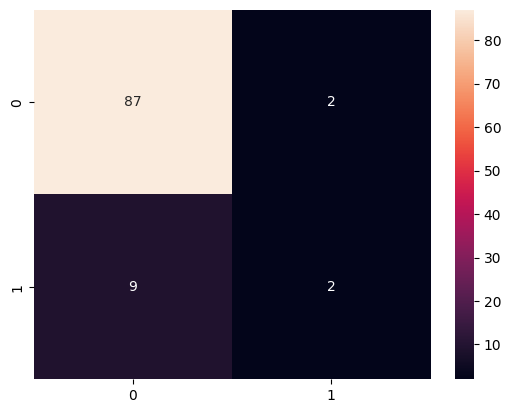

In [29]:
sns.heatmap(cf, annot=True)
plt.show()

In [30]:
precision_score(y_test, lr.predict(x_test))*100

np.float64(50.0)

In [31]:
recall_score(y_test, lr.predict(x_test))*100

np.float64(18.181818181818183)

In [32]:
f1_score(y_test, lr.predict(x_test))*100

np.float64(26.666666666666668)

## Imbalanced Data

In [2]:
id_dataset = pd.read_csv("logistic_regression_heart_disease_dataset.csv")

In [3]:
id_dataset.head(3)

,BMI,Cholesterol,BMI^2,Cholesterol^2,BMI_Cholesterol_Interaction,HeartDisease
0,26.239883,254.724257,688.531440,64884.447157,6683.934605,0
1,38.915715,230.414455,1514.432854,53090.821051,8966.743201,0
2,34.103867,196.429142,1163.073725,38584.408001,6698.993294,0


In [5]:
id_dataset["HeartDisease"].value_counts()

HeartDisease
0    445
1     55
Name: count, dtype: int64

In [6]:
x = id_dataset[["BMI", "Cholesterol"]]
y = id_dataset["HeartDisease"]

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.linear_model import LogisticRegression 

In [11]:
lr = LogisticRegression()

In [12]:
lr.fit(x_train,y_train)

LogisticRegression()

In [13]:
lr.score(x_test,y_test)

0.89

### Random Under Sampling

In [23]:
x2 = id_dataset[["BMI", "Cholesterol"]]
y2 = id_dataset["HeartDisease"]

In [24]:
y2.value_counts()

HeartDisease
0    445
1     55
Name: count, dtype: int64

In [25]:
from imblearn.under_sampling import RandomUnderSampler

In [37]:
ru = RandomUnderSampler()
ru_x, ru_y = ru.fit_resample(x2,y2) 

In [38]:
ru_y.value_counts()

HeartDisease
0    55
1    55
Name: count, dtype: int64

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x1_train, x1_test, y1_train, y1_test = train_test_split(ru_x, ru_y, test_size=0.2,random_state=42)

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
lr1 = LogisticRegression()

In [43]:
lr1.fit(x1_train, y1_train)

LogisticRegression()

In [44]:
lr1.score(x1_test,y1_test)

0.7727272727272727

### Random Over Sampling

In [45]:
from imblearn.over_sampling import RandomOverSampler

In [46]:
ru = RandomOverSampler()
ru_x1, ru_y1 = ru.fit_resample(x2,y2) 

In [47]:
ru_y1.value_counts()

HeartDisease
0    445
1    445
Name: count, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [48]:
x2_train, x2_test, y2_train, y2_test = train_test_split(ru_x1, ru_y1, test_size=0.2,random_state=42)

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
lr2 = LogisticRegression()

In [52]:
lr2.fit(x2_train, y2_train)

LogisticRegression()

In [53]:
lr1.score(x2_test,y2_test)

0.7752808988764045

## Naive Bayes

In [3]:
from mlxtend.plotting import plot_decision_regions

In [4]:
nb_dataset = pd.read_csv('naive_bayes_email_spam_dataset.csv')

In [5]:
nb_dataset.head()

,NumWords,NumLinks,NumSpecialChars,NumUppercaseWords,IsSpam
0,107,1,25,8,1
1,440,9,33,8,1
2,353,0,44,39,1
3,275,7,5,16,1
4,111,0,36,0,1


In [6]:
nb_dataset.isnull().sum()

NumWords             0
NumLinks             0
NumSpecialChars      0
NumUppercaseWords    0
IsSpam               0
dtype: int64

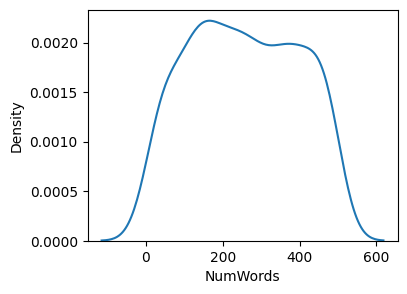

In [19]:
plt.figure(figsize=(4,3))
sns.kdeplot(data=nb_dataset["NumWords"])
plt.show()

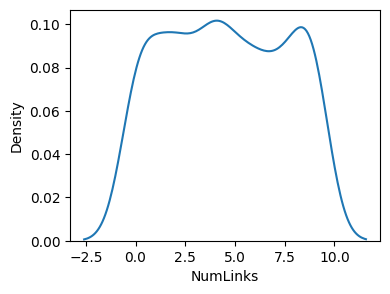

In [21]:
plt.figure(figsize=(4,3))
sns.kdeplot(data=nb_dataset["NumLinks"])
plt.show()

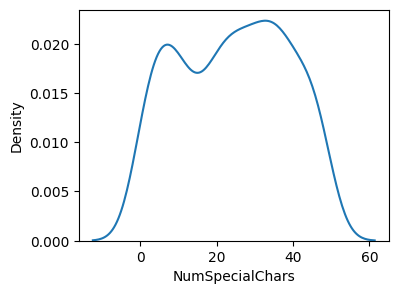

In [22]:
plt.figure(figsize=(4,3))
sns.kdeplot(data=nb_dataset["NumSpecialChars"])
plt.show()

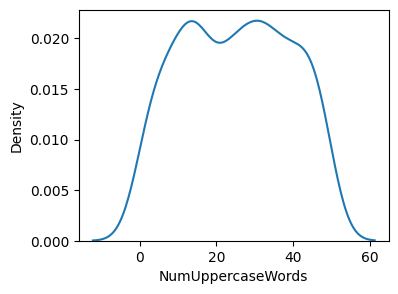

In [23]:
plt.figure(figsize=(4,3))
sns.kdeplot(data=nb_dataset["NumUppercaseWords"])
plt.show()

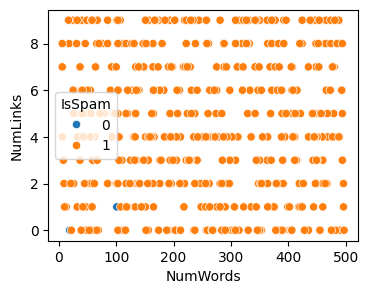

In [20]:
plt.figure(figsize=(4,3))
sns.scatterplot(x='NumWords', y='NumLinks', data =nb_dataset, hue='IsSpam')
plt.show()

In [12]:
x = nb_dataset.iloc[:, :-1]
y = nb_dataset["IsSpam"]

In [13]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [26]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [28]:
gnb  = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [34]:
gnb.score(x_train, y_train),gnb.score(x_test, y_test)

(1.0, 0.99)

In [30]:
mnb  = MultinomialNB()
mnb.fit(x_train, y_train)

MultinomialNB()

In [36]:
mnb.score(x_train, y_train),mnb.score(x_test, y_test)

(0.755, 0.76)

In [32]:
bnb  = BernoulliNB()
bnb.fit(x_train, y_train)

BernoulliNB()

In [35]:
bnb.score(x_train, y_train),bnb.score(x_test, y_test)

(0.9975, 0.99)

## Decision Tree (Classification)

In [2]:
dt_dataset = pd.read_csv("decision_tree_loan_approval_dataset.csv")

In [3]:
dt_dataset.head()

,Income,CreditScore,Age,LoanAmount,ExistingLoansCount,LoanApproved
0,141958,460,25,15616,3,1
1,35795,555,28,42129,4,0
2,20860,622,58,44837,3,0
3,123694,427,54,29574,1,1
4,148106,317,31,8430,1,1


In [4]:
dt_dataset.isnull().sum()

Income                0
CreditScore           0
Age                   0
LoanAmount            0
ExistingLoansCount    0
LoanApproved          0
dtype: int64

In [5]:
x = dt_dataset.iloc[:,:-1]
y = dt_dataset["LoanApproved"]

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
sc = StandardScaler()
x = pd.DataFrame(sc.fit_transform(x), columns=x.columns)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
dt = DecisionTreeClassifier(criterion="entropy")

In [34]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [35]:
dt.score(x_test, y_test)*100

97.0

In [36]:
dt.score(x_train, y_train)*100

100.0

In [14]:
dt.predict([[141958, 460, 25, 15616,3]])

C:\Users\Z\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [15]:
from sklearn.tree import plot_tree

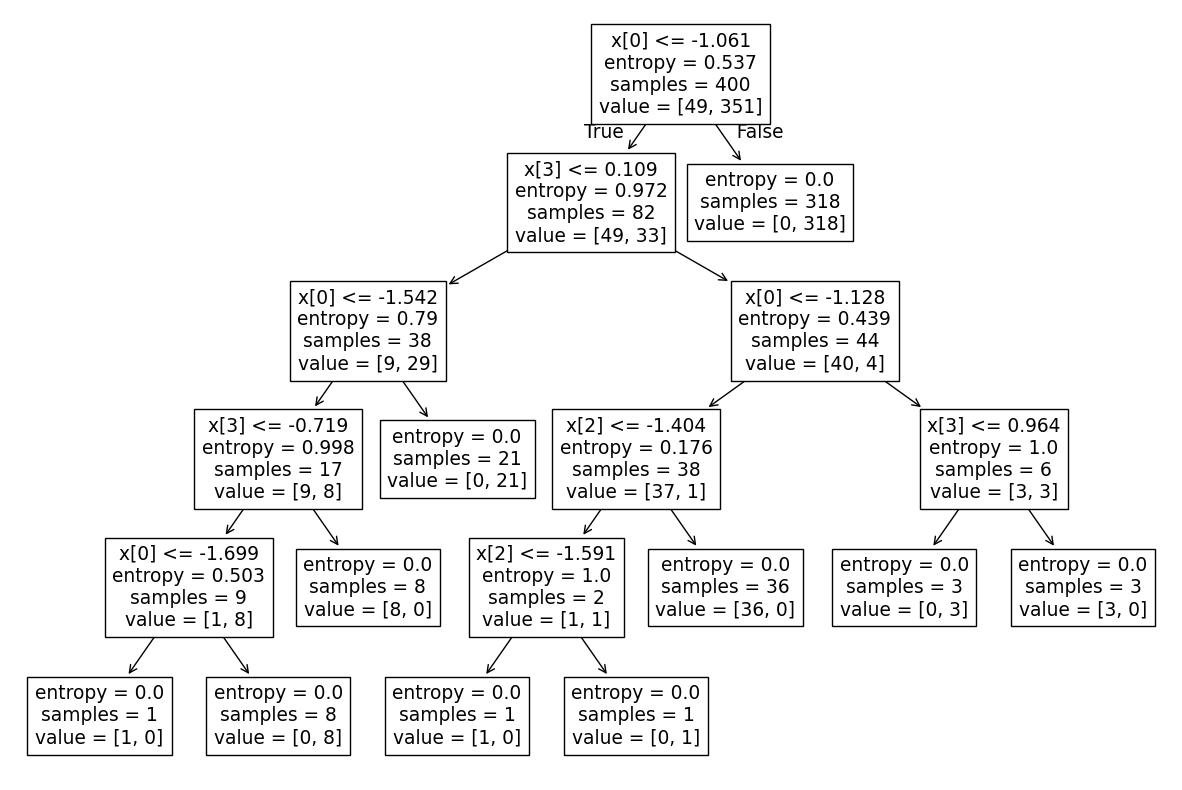

In [16]:
plt.figure(figsize=(15,10))
plot_tree(dt)
plt.show()

## Decision Tree (Regression)

In [4]:
dtr_dataset = pd.read_csv("decision_tree_house_price_dataset.csv")

In [5]:
dtr_dataset.head()

,SquareFeet,Bedrooms,HousePrice
0,1360,1,201472
1,4272,1,678707
2,3592,3,588678
3,966,5,258928
4,4926,4,817860


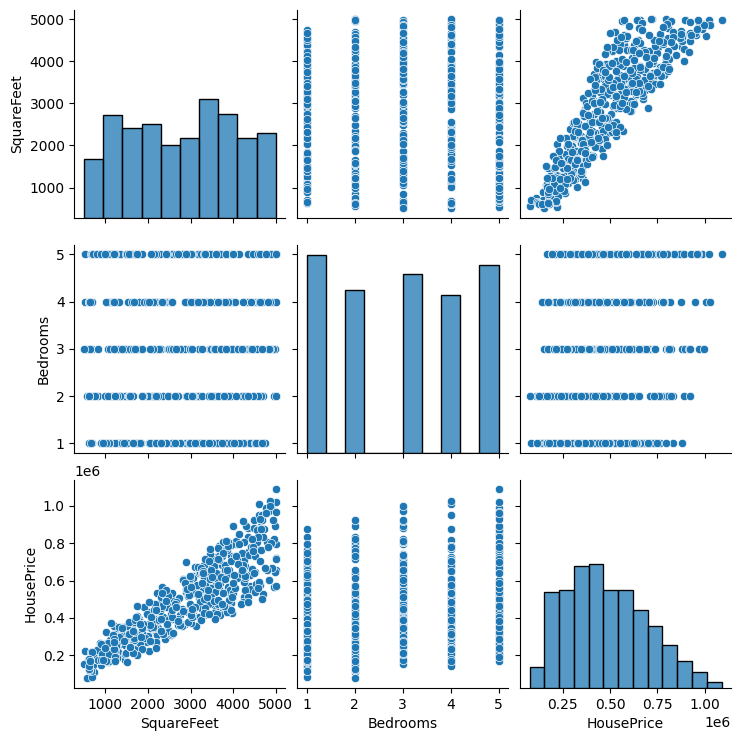

In [6]:
sns.pairplot(data=dtr_dataset)
plt.show()

In [7]:
x = dtr_dataset.iloc[:,:-1]
y = dtr_dataset["HousePrice"]

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [22]:
dtr = DecisionTreeRegressor(max_depth=4)

In [23]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=4)

In [24]:
dtr.score(x_train,y_train)*100, dtr.score(x_test,y_test)*100

(81.70639945503669, 77.87788628664096)

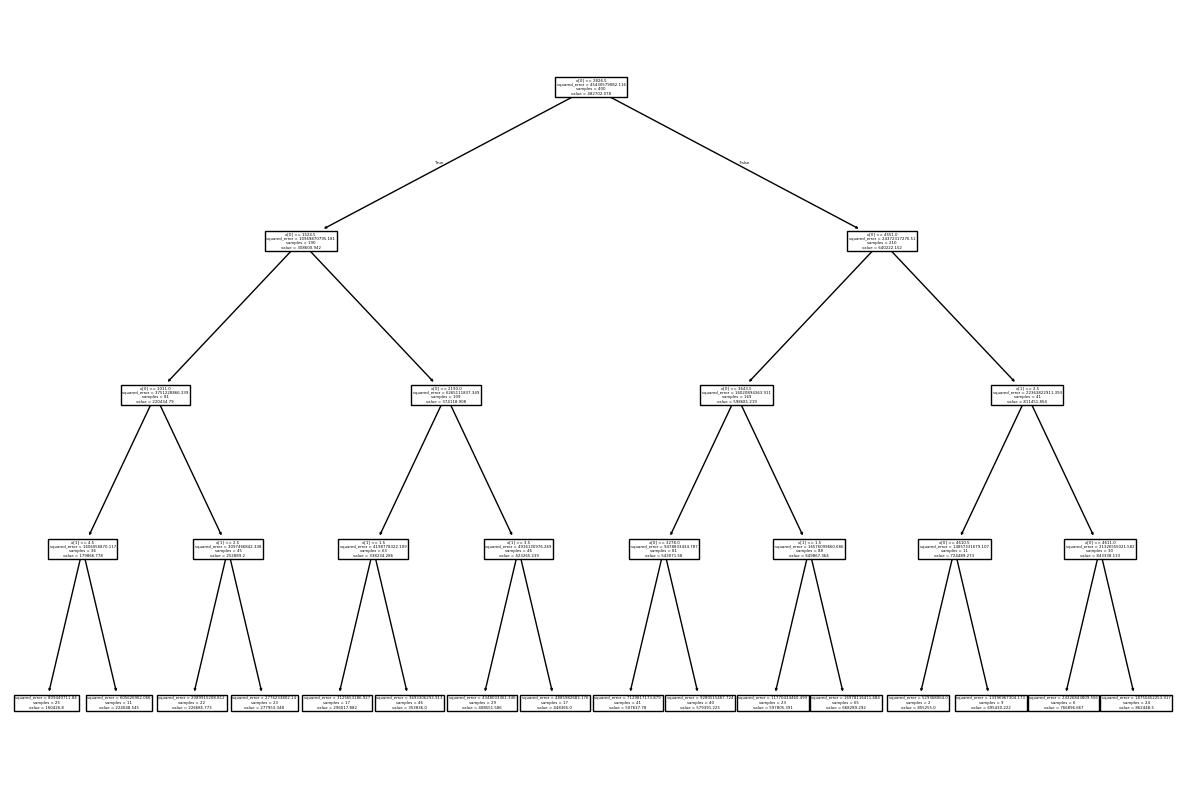

In [25]:
plt.figure(figsize=(15,10))
plot_tree(dtr)
plt.show()